In [10]:
from random import randint

In [83]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [47]:
class Car:
    def __init__(self,velocity,vmax):
        self.velocity = velocity
        self.vmax = vmax
        
    def __str__(self):
        return "Velocity: {0}, Vmax: {1}".format(self.velocity,self.vmax)
    def __repr__(self):
        return "Velocity: {0}, Vmax: {1}".format(self.velocity,self.vmax)
    def increaseVelocity(self):
        self.velocity += 1
    def decreaseVelocity(self):
        self.velocity -= 1    

In [8]:
x = Car(2,3)

In [9]:
x

Velocity: 2, Vmax: 3

In [15]:
vmax = randint(55,75)

4

In [155]:
num_cars = 10
cars = []

for x in range(0,num_cars):
    vmax = randint(55,75)
    velocity = randint(45,vmax)
    cars.append(Car(velocity, vmax))

In [156]:
locations = []
curr_location = 0
for ix, car in enumerate(cars):
    locations.append(curr_location)
    curr_location += randint(car.vmax,car.vmax+50)

In [157]:
cars_and_locs = list(zip(cars,locations))
cars_and_locs = [list(a) for a in cars_and_locs]

In [158]:
num_steps = 1000000
magic_num = 57 # 1% chance
avgvs = []
for _ in range(0,num_steps):  # each time step
    for ix, (car, loc) in enumerate(cars_and_locs):
        if car.velocity < car.vmax:
            if ix == num_cars - 1:
                car.increaseVelocity()
            else:
                if loc + car.velocity < cars_and_locs[ix+1][1]:
                    car.increaseVelocity()
    temp = []
    for ix, (car, loc) in enumerate(cars_and_locs):
        if randint(0,100) == magic_num:
            cars_and_locs[ix][0].decreaseVelocity()
        cars_and_locs[ix][1] += car.velocity
        temp.append(car.velocity)
        
    avgvs.append(sum(temp))

In [159]:
vmaxs = [car.velocity for car, loc in cars_and_locs]

In [160]:
curr_min = vmaxs[-1]
for ix, v in enumerate(reversed(vmaxs)):
    if ix < len(vmaxs)-1:
        if vmaxs[ix+1] > curr_min:
            vmaxs[ix+1] = curr_min
        else: 
            curr_min = vmaxs[ix+1]

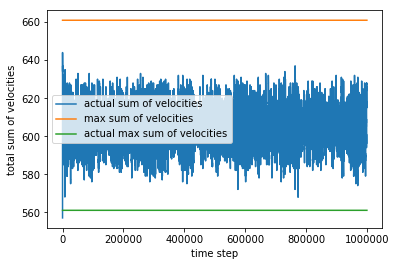

In [161]:
plt.plot(range(0,num_steps),avgvs, label="actual sum of velocities")
plt.plot(range(0,num_steps),[sum([car.vmax for car, loc in cars_and_locs])]*num_steps, label="max sum of velocities")
plt.plot(range(0,num_steps),[sum(vmaxs)]*num_steps, label="actual max sum of velocities")

plt.ylabel("total sum of velocities")
plt.xlabel("time step")
plt.legend()